## **Global GEV fit**

In [1]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *

### **Maps of changing climate**

#### **Maps of annual max temperatures**

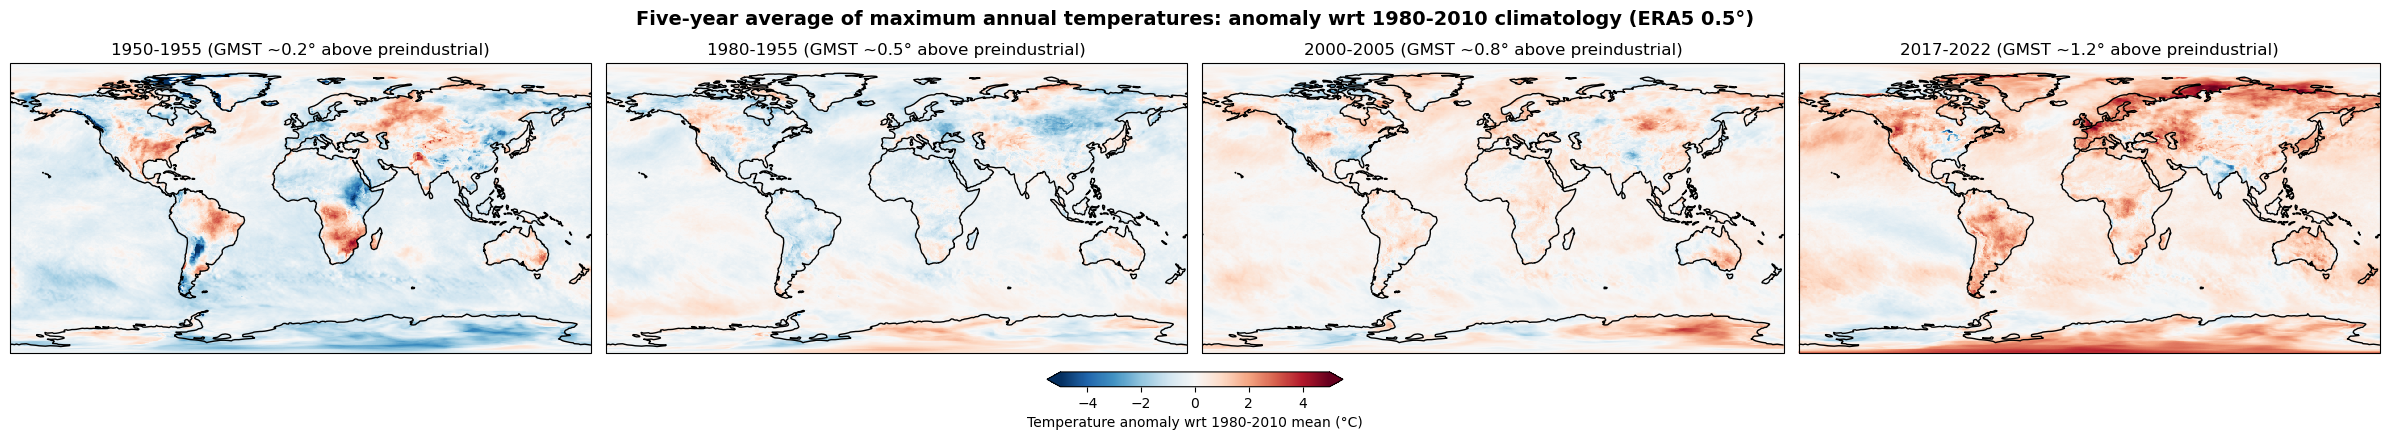

In [129]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm
da = convert_units_to(decode_times(xr.open_dataset("era5_tmax_daily_1_max_70.nc", decode_times = False)).max_tmax, "degC")#.where(lsm >= 0.5)
da = da.assign_coords(time = da.time.dt.year).rename(time = "year")

da_anom = (da.rolling(year = 5, center = False).mean() - da.sel(year = slice(1980, 2010)).mean("year")).sel(year = [1955, 1985, 2005, 2022])

da_anom.plot(col = "year", figsize = (24,4), subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, vmin = -5, vmax = 5, cmap = "RdBu_r",
             cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "label" : "Temperature anomaly wrt 1980-2010 mean (°C)"})

for ax in plt.gcf().axes[:-1]:
    ax.coastlines()
    
plt.gcf().axes[0].set_title("1950-1955 (GMST ~0.2° above preindustrial)")
plt.gcf().axes[1].set_title("1980-19855 (GMST ~0.5° above preindustrial)")
plt.gcf().axes[2].set_title("2000-2005 (GMST ~0.8° above preindustrial)")
plt.gcf().axes[3].set_title("2017-2022 (GMST ~1.2° above preindustrial)")

plt.suptitle("Five-year average of maximum annual temperatures: anomaly wrt 1980-2010 climatology (ERA5 0.5°)", fontweight = "bold", fontsize = 14)
plt.savefig("era5_maxtmax-anom.png")

#### **Maps of annual precipitation**

In [152]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm
da = decode_times(xr.open_dataset("era5_prcp_daily_1_sum_70.nc", decode_times = False)).tp.where(lsm >= 0.5)

da = da.assign_coords(time = da.time.dt.year).rename(time = "year").rolling(year = 5, center = False).mean()
da_clim = da.sel(year = slice(1980, 2010)).mean("year")

da_anom = ((da - da_clim) / da_clim * 100).sel(year = [1955, 1985, 2005, 2022])

da_anom.plot(col = "year", figsize = (24,4), subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, cmap = "BrBG", vmin = -50,
             cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "label" : "Annual precipitation anomaly wrt 1980-2010 mean (%)"})

for ax in plt.gcf().axes[:-1]:
    ax.coastlines()
    
plt.gcf().axes[0].set_title("1950-1955 (GMST ~0.2° above preindustrial)")
plt.gcf().axes[1].set_title("1980-1985 (GMST ~0.5° above preindustrial)")
plt.gcf().axes[2].set_title("2000-2005 (GMST ~0.8° above preindustrial)")
plt.gcf().axes[3].set_title("2017-2022 (GMST ~1.2° above preindustrial)")

plt.suptitle("Five-year average of total annual precipitation: relative anomaly wrt 1980-2010 climatology (ERA5 0.5°)", fontweight = "bold")
plt.savefig("era5_tp-relanom.png")

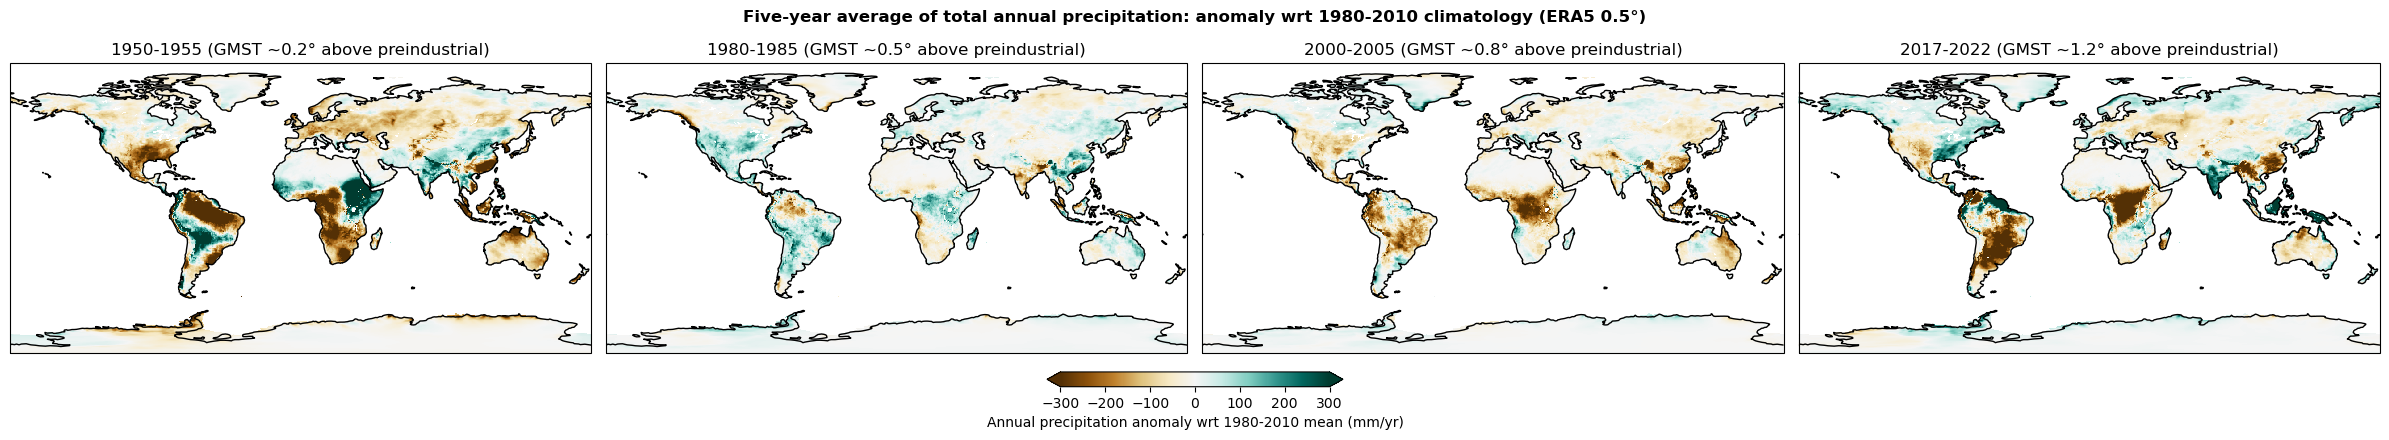

In [156]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm
da = decode_times(xr.open_dataset("era5_prcp_daily_1_sum_70.nc", decode_times = False)).tp.where(lsm >= 0.5)

da = da.assign_coords(time = da.time.dt.year).rename(time = "year").rolling(year = 5, center = False).mean()
da_clim = da.sel(year = slice(1980, 2010)).mean("year")

da_anom = ((da - da_clim)).sel(year = [1955, 1985, 2005, 2022])

da_anom.plot(col = "year", figsize = (24,4), subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, cmap = "BrBG", vmin = -300,
             cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "label" : "Annual precipitation anomaly wrt 1980-2010 mean (mm/yr)"})

for ax in plt.gcf().axes[:-1]:
    ax.coastlines()
    
plt.gcf().axes[0].set_title("1950-1955 (GMST ~0.2° above preindustrial)")
plt.gcf().axes[1].set_title("1980-1985 (GMST ~0.5° above preindustrial)")
plt.gcf().axes[2].set_title("2000-2005 (GMST ~0.8° above preindustrial)")
plt.gcf().axes[3].set_title("2017-2022 (GMST ~1.2° above preindustrial)")

plt.suptitle("Five-year average of total annual precipitation: anomaly wrt 1980-2010 climatology (ERA5 0.5°)", fontweight = "bold")
plt.savefig("era5_tp-anom.png")

### **Plots for animation**

In [11]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm
da = convert_units_to(decode_times(xr.open_dataset("era5_tmax_daily_1_max_70.nc", decode_times = False)).max_tmax, "degC")#.where(lsm >= 0.5)

da = da.assign_coords(time = da.time.dt.year).rolling(time = 5, center = True).mean() 

da_anom = (da - da.sel(time = slice("1980", "2010")).mean("time")).dropna("time", "all")

In [12]:
for y in da_anom.time.values:
    
    da_y = da_anom.sel(time = y)
    da_y.plot(figsize = (6,3.7), subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, vmin = -5, vmax = 5, cmap = "RdBu_r",
             cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "label" : "Temperature anomaly (°C)", "extend" : "both"})
    
    ax = plt.gcf().axes[0]
    ax.coastlines()
    ax.set_title(str(y))
    
    plt.suptitle("5-year average of annual temperature maxima\n(anomaly wrt 1980-2010 climatology)", fontweight = "bold")
    
    plt.savefig("img/maxtmax_"+str(y)+".png"); plt.close()
    

### **Fitted GEVs**

#### **Prep data for R processing**

In [25]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm
da = convert_units_to(decode_times(xr.open_dataset("era5_tmax_daily_1_max_70.nc", decode_times = False)).max_tmax.where(lsm >= 0.5), "degC")
da = da.assign_coords(time = da.time.dt.year).rename(time = "year")

# too much data to process in single hit - slice into blocks of ten columns instead
for i in range(72):
    i1 = i*10
    i2 = (i+1)*10
    da.isel(lon = slice(i1,i2)).stack(xy = ["lat", "lon"]).to_pandas().to_csv("data/era5_tx1x_flattened_"+str(i1).rjust(3, "0")+"-"+str(i2).rjust(3, "0")+".csv")

#### **Reconstruct fitted maps**

In [2]:
lsm = xr.open_dataset("../../../Data/era5/era5_lsm_05.nc").squeeze(drop = True).lsm

lon_slices = []
for fnm in sorted(glob.glob("fitted/*.csv")):
    
    lon1 = int(fnm[-11:-8])
    lon2 = int(fnm[-7:-4])

    df = pd.read_csv(fnm, index_col = 0)
    fitted = xr.Dataset(data_vars = {vnm : xr.DataArray(np.array(df.loc[vnm]).reshape((360,10)), dims = ["lat", "lon"]) for vnm in df.index},
                        coords = {"lat" : lsm.lat, "lon" : lsm.isel(lon = slice(lon1, lon2)).lon})
    lon_slices.append(fitted)
fitted = xr.concat(lon_slices, "lon")
fitted.to_netcdf("era5_maxtmax_fitted-change.nc")

#### **Maps of fitted parameters**

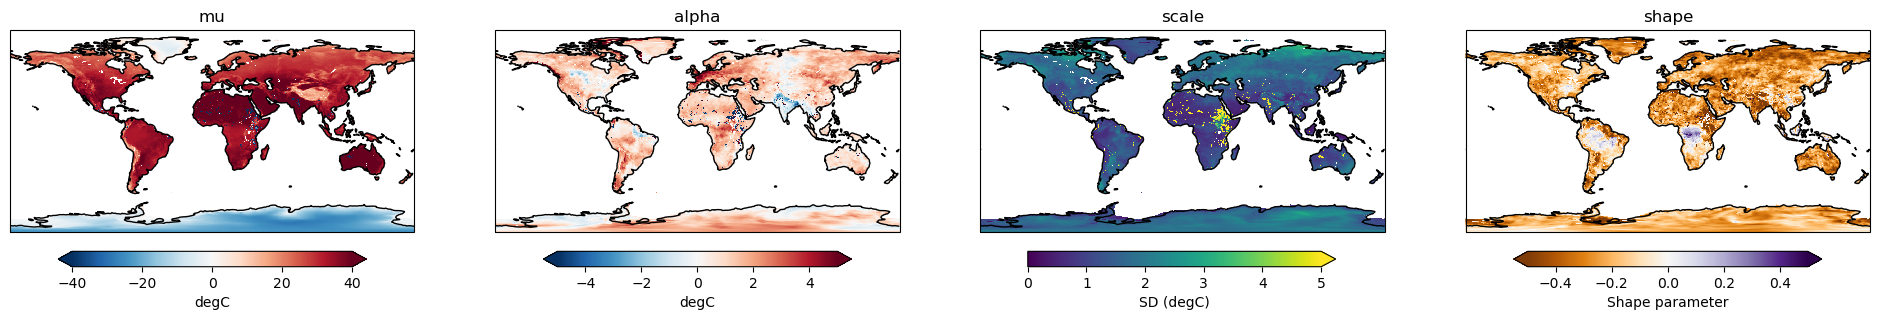

In [13]:
fitted = xr.open_dataset("era5_maxtmax_fitted-change.nc")
fig, axs = plt.subplots(ncols = 4, figsize = (24,5), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85}

fitted.mu0.plot(ax = axs[0], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmax = 40); axs[0].set_title("mu")
fitted.mu1.plot(ax = axs[1], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmin = -5); axs[1].set_title("alpha")
fitted.scale.plot(ax = axs[2], cbar_kwargs = cbar_kwargs | {"label" : "SD (degC)"}, vmin = 0, vmax = 5); axs[2].set_title("scale")
fitted.shape.plot(ax = axs[3], cbar_kwargs = cbar_kwargs | {"label" : "Shape parameter"}, vmin = -0.5, vmax = 0.5, cmap = "PuOr"); axs[3].set_title("shape")

for ax in axs:
    ax.coastlines()

#### **Maps of twenty-year event**

In [67]:
fitted = xr.open_dataset("era5_maxtmax_fitted-change.nc")
fitted_anom = fitted - fitted["1980"]

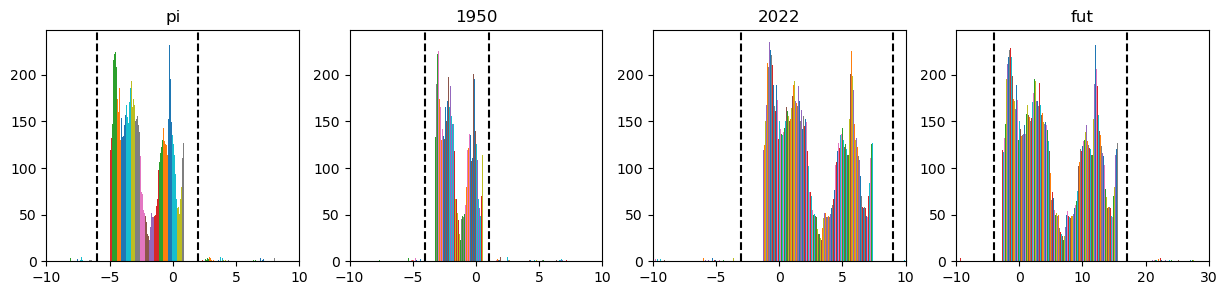

In [68]:
# histograms of values to identify outliers
fig, axs = plt.subplots(ncols = 4, figsize = (15,3))
for i in range(4):
    varnm = ["pi", "1950", "2022", "fut"][i]
    axs[i].hist(fitted_anom[varnm])
    # axs[i].set_ylim(0,20)
    axs[i].set_xlim(-10,10)
    axs[i].set_title(varnm)

axs[3].set_xlim(-10,30)

[axs[0].axvline(x, ls = "--", color = "k") for x in [-6, 2]]
[axs[1].axvline(x, ls = "--", color = "k") for x in [-4, 1]]
[axs[2].axvline(x, ls = "--", color = "k") for x in [-3, 9]]
[axs[3].axvline(x, ls = "--", color = "k") for x in [-4, 17]]

In [69]:
# filter out those extreme values manually for plotting - will investigate reasons for their existence later
fitted_anom["pi"] = fitted_anom["pi"].where(np.logical_and(fitted_anom["pi"] > -6, fitted_anom["pi"] < 2))
fitted_anom["1950"] = fitted_anom["1950"].where(np.logical_and(fitted_anom["1950"] > -4, fitted_anom["1950"] < 1))
fitted_anom["2022"] = fitted_anom["2022"].where(np.logical_and(fitted_anom["2022"] > -3, fitted_anom["2022"] < 9))
fitted_anom["fut"] = fitted_anom["fut"].where(np.logical_and(fitted_anom["fut"] > -4, fitted_anom["fut"] < 17))

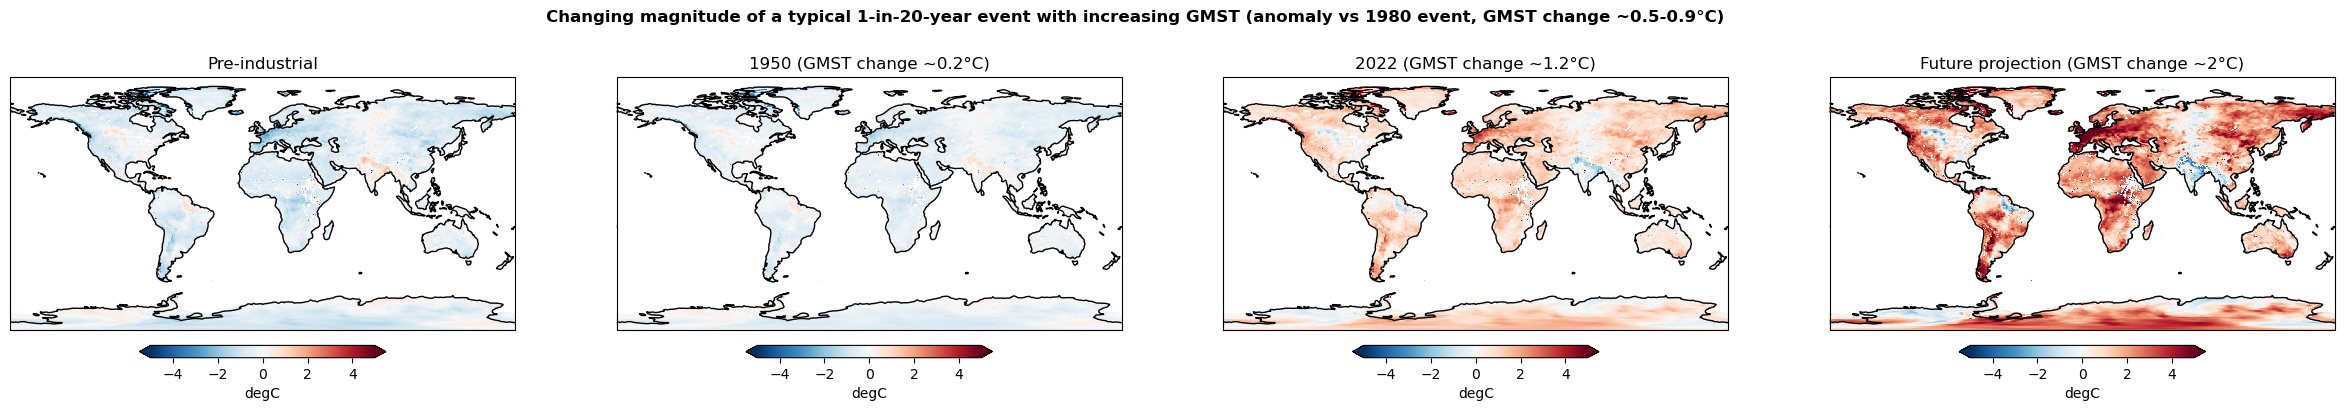

In [70]:
fig, axs = plt.subplots(ncols = 4, figsize = (30,4), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar_kwargs = {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "extend" : "both"}

fitted_anom.pi.plot(ax = axs[0], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmax = 5); axs[0].set_title("Pre-industrial")
fitted_anom["1950"].plot(ax = axs[1], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmax = 5); axs[1].set_title("1950 (GMST change ~0.2°C)")
fitted_anom["2022"].plot(ax = axs[2], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmax = 5); axs[2].set_title("2022 (GMST change ~1.2°C)")
fitted_anom["fut"].plot(ax = axs[3], cbar_kwargs = cbar_kwargs | {"label" : "degC"}, vmax = 5); axs[3].set_title("Future projection (GMST change ~2°C)")

for ax in axs: ax.coastlines()

plt.suptitle("Changing magnitude of a typical 1-in-20-year event with increasing GMST (anomaly vs 1980 event, GMST change ~0.5-0.9°C)", fontweight = "bold")
plt.savefig("era5_rl20.png")

#### **Maps of twenty-year event vs PI**

In [71]:
fitted = xr.open_dataset("era5_maxtmax_fitted-change.nc")
fitted_anom = fitted - fitted["pi"]

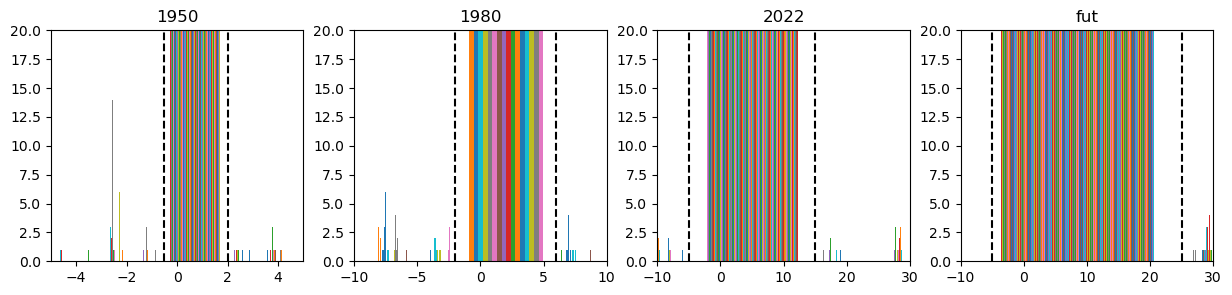

In [78]:
# histograms of values to identify outliers
fig, axs = plt.subplots(ncols = 4, figsize = (15,3))
for i in range(4):
    varnm = ["1950", "1980", "2022", "fut"][i]
    axs[i].hist(fitted_anom[varnm])
    axs[i].set_ylim(0,20)
    axs[i].set_title(varnm)

axs[0].set_xlim(-5,5)
axs[1].set_xlim(-10,10)
axs[2].set_xlim(-10,30)
axs[3].set_xlim(-10,30)


[axs[0].axvline(x, ls = "--", color = "k") for x in [-0.5, 2]]
[axs[1].axvline(x, ls = "--", color = "k") for x in [-2, 6]]
[axs[2].axvline(x, ls = "--", color = "k") for x in [-5, 15]]
[axs[3].axvline(x, ls = "--", color = "k") for x in [-5, 25]]

In [79]:
# filter out those extreme values manually for plotting - will investigate reasons for their existence later
fitted_anom["1950"] = fitted_anom["1950"].where(np.logical_and(fitted_anom["1950"] > -0.5, fitted_anom["1950"] < 2))
fitted_anom["1980"] = fitted_anom["1980"].where(np.logical_and(fitted_anom["1980"] > -2, fitted_anom["1980"] < 6))
fitted_anom["2022"] = fitted_anom["2022"].where(np.logical_and(fitted_anom["2022"] > -5, fitted_anom["2022"] < 15))
fitted_anom["fut"] = fitted_anom["fut"].where(np.logical_and(fitted_anom["fut"] > -5, fitted_anom["fut"] < 25))

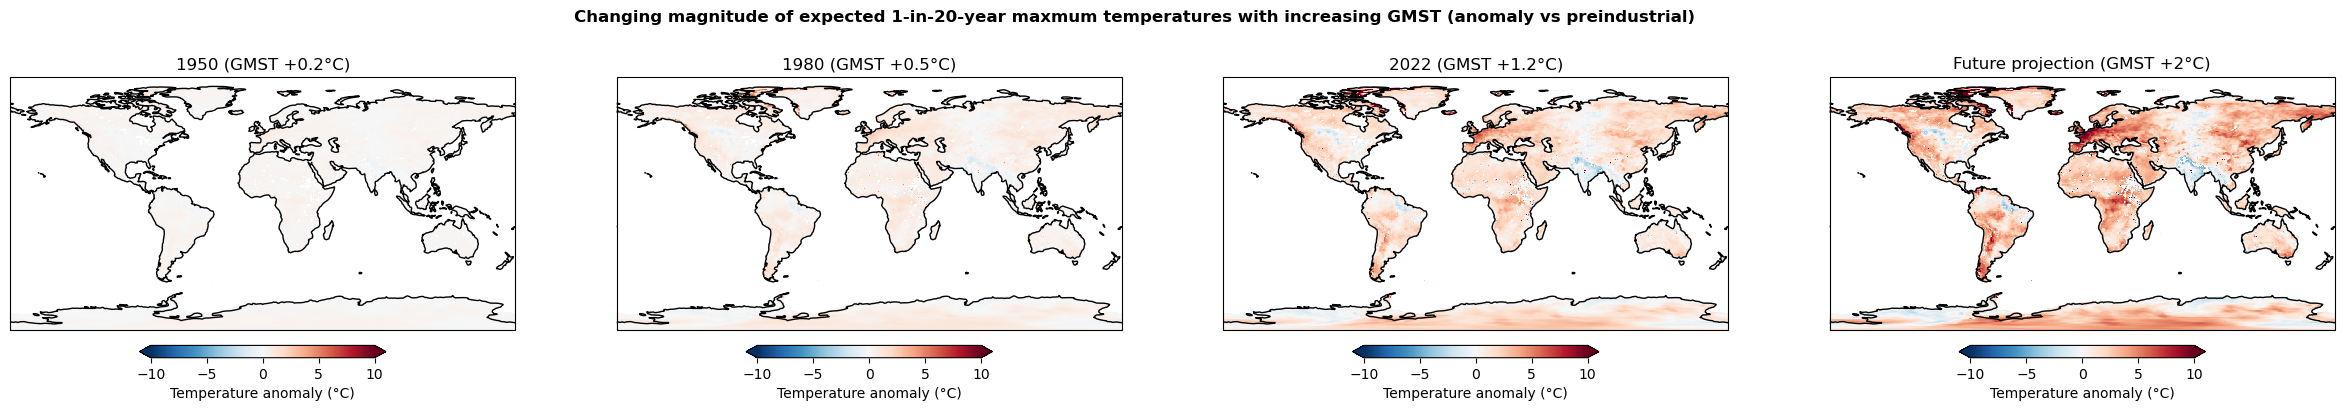

In [84]:
fig, axs = plt.subplots(ncols = 4, figsize = (30,4), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
plot_kwargs = {"vmax" : 10, "cbar_kwargs" : {"location" : "bottom", "fraction" : 0.04, "pad" : 0.05, "shrink" : 0.85, "extend" : "both", "label" : "Temperature anomaly (°C)"}}

fitted_anom["1950"].plot(ax = axs[0], **plot_kwargs); axs[0].set_title("1950 (GMST +0.2°C)")
fitted_anom["1980"].plot(ax = axs[1], **plot_kwargs); axs[1].set_title("1980 (GMST +0.5°C)")
fitted_anom["2022"].plot(ax = axs[2], **plot_kwargs); axs[2].set_title("2022 (GMST +1.2°C)")
fitted_anom["fut"].plot(ax = axs[3], **plot_kwargs); axs[3].set_title("Future projection (GMST +2°C)")

for ax in axs: ax.coastlines()

plt.suptitle("Changing magnitude of expected 1-in-20-year maxmum temperatures with increasing GMST (anomaly vs preindustrial)", fontweight = "bold")
plt.savefig("era5_rl20-vs-PI.png")